# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

## 1. import 작업

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

## 2. 데이터 살펴보기

In [102]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data/BostonHousing.xls")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 3. 데이터 전처리 (데이터 타입과 결측값 확인하기)

In [103]:
df.shape

(506, 15)

In [104]:
# 데이터 정보 불러오기 
df.info() 
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [105]:
# 결측값 다시 한번 확인
df.isna().sum() 
# 결측값 없음

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [106]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,0


In [107]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

## 4. 주택가격(MEDV)와 관련있는 Factor 찾기

In [108]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


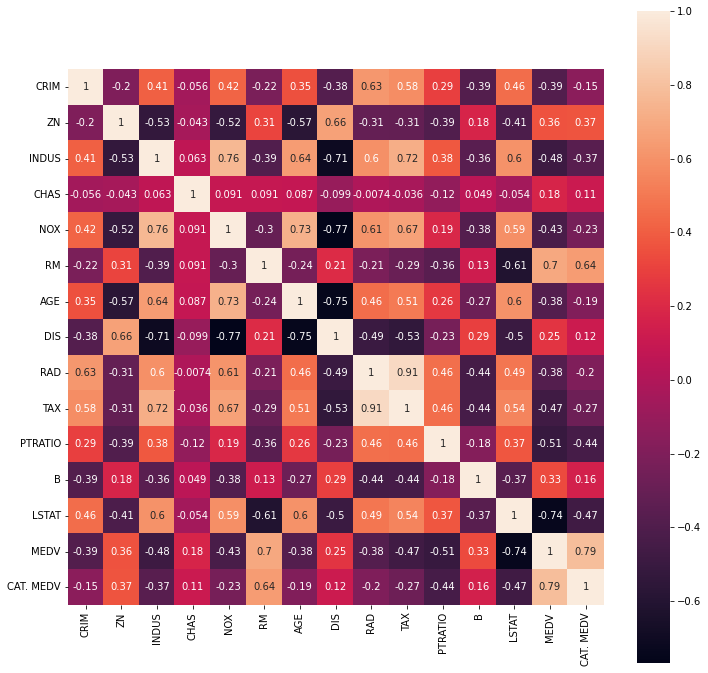

In [109]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, square=True)
plt.show()

Heatmap에 표현된 상관관계표에 따라
- 비소매상업지역 면적 비율(INDUS)
- 방의 수(RM)
- 재산세율(TAX)
- 학생-교사 비율(PTRATIO)
- 하위 계층 비율(LSTAT)

주택가격(MEDV)와 좋은 상관관계를 보여줌

In [110]:
# 주택가격과 상관관계가 좋은 Factor들로만 dfn 정의
dfn = df[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]
dfn.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,6.575,296,15.3,4.98,24.0
1,7.07,6.421,242,17.8,9.14,21.6
2,7.07,7.185,242,17.8,4.03,34.7
3,2.18,6.998,222,18.7,2.94,33.4
4,2.18,7.147,222,18.7,5.33,36.2


## 5. 데이터 분포 확인하기

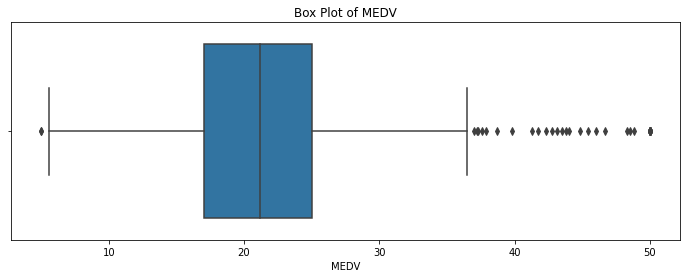

In [112]:
# 주택가격 분포도, Box Plot
plt.figure(figsize=(12,4))
sns.boxplot(dfn.MEDV)
plt.title("Box Plot of MEDV")
plt.show()
# 주택가격이 약 17,000불 후반에서 25,000불 정도에 많이 몰려있음

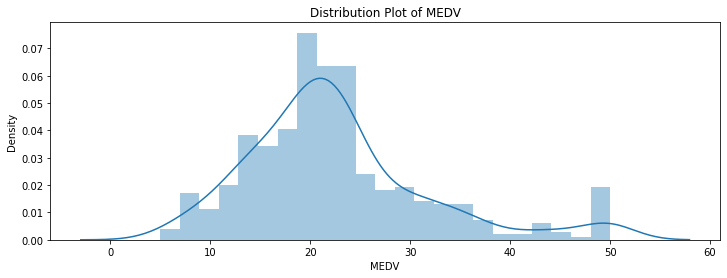

In [113]:
# 주택가격 분포도, Distribution Plot, Histogram
plt.figure(figsize=(12,4))
sns.distplot(dfn.MEDV)
plt.title("Distribution Plot of MEDV")
plt.show()

주택가격(MEDV)은 정규분포로 되어있다

주택가격이 50,000에 가까이 되는 것은 outlier일 수도 있다


In [128]:
# 상세정보
dfn.describe().round(2)

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00
mean,11.14,6.28,408.24,18.46,12.65,22.53
std,6.86,0.70,168.54,2.16,7.14,9.20
min,0.46,3.56,187.00,12.60,1.73,5.00
25%,5.19,5.89,279.00,17.40,6.95,17.02
50%,9.69,6.21,330.00,19.05,11.36,21.20
75%,18.10,6.62,666.00,20.20,16.96,25.00
max,27.74,8.78,711.00,22.00,37.97,50.00


##6. 주택가격과 factor들간의 관계


###6-1 방의 수(RM)와 주택가격(MEDV)의 관계

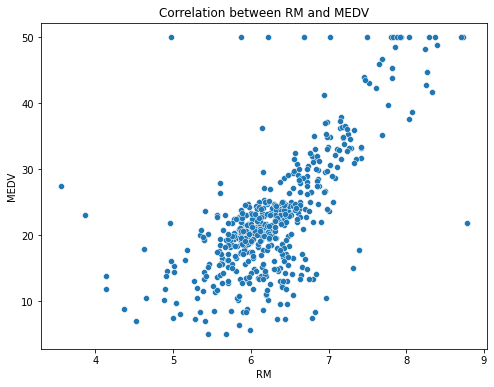

In [202]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfn.RM, dfn.MEDV)
plt.title("Correlation between RM and MEDV")
plt.show()

방의수와 주택가격의 관계는 
- 정규분포 되어있다(Nomally Distributed)
- 양의 선형 관계를 가지고있다 (Positive Linear Relationship)

예외. 방의 개수가 적은데 비해 주택가격이 높은 경우는 outlier일 수 있다

예외. 방의 개수가 많은데 비해 주택가격이 낮은 경우는 outlier일 수 있다

결론 : 방의 갯수가 많을수록 주택가격은 높아진다

In [132]:
dfn.describe().round(2)

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00
mean,11.14,6.28,408.24,18.46,12.65,22.53
std,6.86,0.70,168.54,2.16,7.14,9.20
min,0.46,3.56,187.00,12.60,1.73,5.00
25%,5.19,5.89,279.00,17.40,6.95,17.02
50%,9.69,6.21,330.00,19.05,11.36,21.20
75%,18.10,6.62,666.00,20.20,16.96,25.00
max,27.74,8.78,711.00,22.00,37.97,50.00


In [144]:
RM_Q1 = dfn['RM'].quantile(.25)
RM_Q3 = dfn['RM'].quantile(.75)
RM_IQR = RM_Q3 - RM_Q1
dfn[dfn['RM'] < RM_Q1 - 1.5*RM_IQR]

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
365,18.1,3.561,666,20.2,7.12,27.5
367,18.1,3.863,666,20.2,13.33,23.1
374,18.1,4.138,666,20.2,37.97,13.8
384,18.1,4.368,666,20.2,30.63,8.8
386,18.1,4.652,666,20.2,28.28,10.5
406,18.1,4.138,666,20.2,23.34,11.9
412,18.1,4.628,666,20.2,34.37,17.9
414,18.1,4.519,666,20.2,36.98,7.0


365, 367 행 데이터 중

방의 개수가 약 3개인데 주택가격이 높은데 

이것은 방의 개수와 주택가격의 양의 상관관계를 크게 벗어나므로 365행과 367행은 이상치라 생각된다

In [145]:
dfn[dfn['RM'] > RM_Q3 + 1.5*RM_IQR]

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
97,2.89,8.069,276,18.0,4.21,38.7
98,2.89,7.820,276,18.0,3.57,43.8
162,19.58,7.802,403,14.7,1.92,50.0
163,19.58,8.375,403,14.7,3.32,50.0
166,19.58,7.929,403,14.7,3.70,50.0
180,2.46,7.765,193,17.8,7.56,39.8
186,2.46,7.831,193,17.8,4.45,50.0
195,0.46,7.875,255,14.4,2.97,50.0
203,2.68,7.853,224,14.7,3.81,48.5
204,2.68,8.034,224,14.7,2.88,50.0


364번 행에서 

방의 개수가 약 9개정도 인거에 비해 주택가격이 낮은데 

이것은 방의 개수와 주택가격의 양의 상관관계를 크게 벗어나므로 364번행은 이상치라 생각된다

###6.2 비소매상업지역 면적비율(INDUS)과 주택가격(MEDV)의 관계

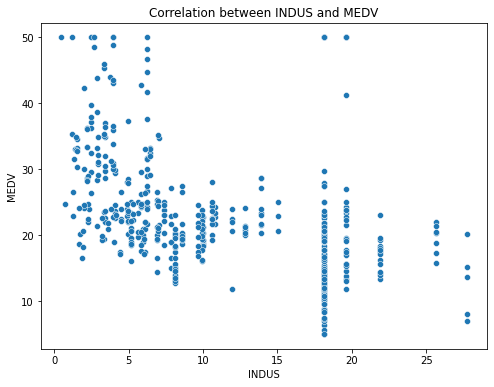

In [215]:
# 비소매상업지역 면적 비율과 주택가격의 관계
plt.figure(figsize=(8,6))
sns.scatterplot(dfn.INDUS, dfn.MEDV)
plt.title("Correlation between INDUS and MEDV")
plt.show()

비소매상업지역 면적 비율이 낮을수록 주택가격이 높다라고 예상

하지만 뚜렷한 상관관계가 나타나지는 않았다

###6.3 재산세율(TAX)과 주택가격(MEDV)의 관계

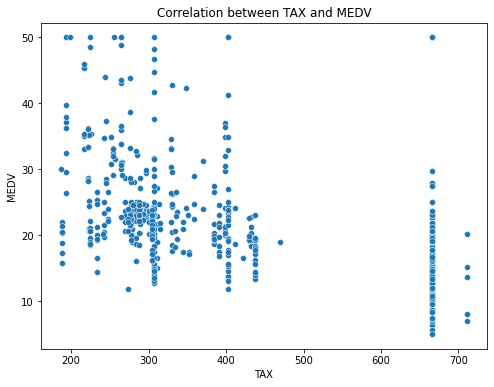

In [217]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfn.TAX, dfn.MEDV)
plt.title("Correlation between TAX and MEDV")
plt.show()

주택가격이 높을수록 재산세율이 높을거라고 예상

하지만 데이터들간의 뚜렷한 상관관계가 나타나지 않았다

In [259]:
#cond = dfn['TAX']<600  dfn['TAX']<500
print(dfn[dfn['TAX']>600])
print('-'*50)
print(dfn[dfn['TAX']==666])
print('-'*50)
print(dfn[dfn['TAX']>666])

     INDUS     RM  TAX  PTRATIO  LSTAT  MEDV
356  18.10  6.212  666     20.2  17.60  17.8
357  18.10  6.395  666     20.2  13.27  21.7
358  18.10  6.127  666     20.2  11.48  22.7
359  18.10  6.112  666     20.2  12.67  22.6
360  18.10  6.398  666     20.2   7.79  25.0
..     ...    ...  ...      ...    ...   ...
488  27.74  5.454  711     20.1  18.06  15.2
489  27.74  5.414  711     20.1  23.97   7.0
490  27.74  5.093  711     20.1  29.68   8.1
491  27.74  5.983  711     20.1  18.07  13.6
492  27.74  5.983  711     20.1  13.35  20.1

[137 rows x 6 columns]
--------------------------------------------------
     INDUS     RM  TAX  PTRATIO  LSTAT  MEDV
356   18.1  6.212  666     20.2  17.60  17.8
357   18.1  6.395  666     20.2  13.27  21.7
358   18.1  6.127  666     20.2  11.48  22.7
359   18.1  6.112  666     20.2  12.67  22.6
360   18.1  6.398  666     20.2   7.79  25.0
..     ...    ...  ...      ...    ...   ...
483   18.1  5.762  666     20.2  10.42  21.8
484   18.1  5.871  666   

재산세율이 666로 동일한 데이터 132개 

재산세율이 711로 동일한 데이터 5개 발견되었는데 

이 데이터들은 학생-교사 비율도 같은걸로 보여지고, 비소매상업지역 면적 비율도 같은걸로 보여진다

그러므로 이 데이터들은 이상치라 생각된다

###6.4 학생-교사 비율(PTRATIO)과 주택가격(MEDV)의 관계

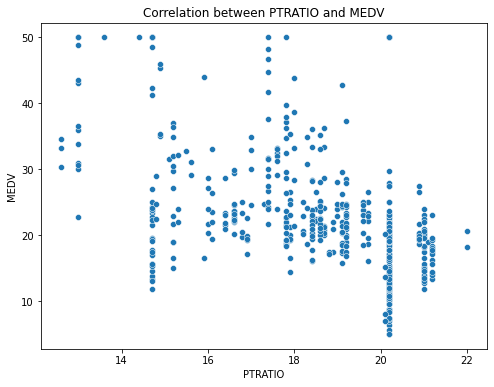

In [216]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfn.PTRATIO, dfn.MEDV)
plt.title("Correlation between PTRATIO and MEDV")
plt.show()

뚜렷한 상관관계는 보이지 않는다

###6.5 하위 계층 비율(LSTAT)과 주택가격(MEDV)의 관계

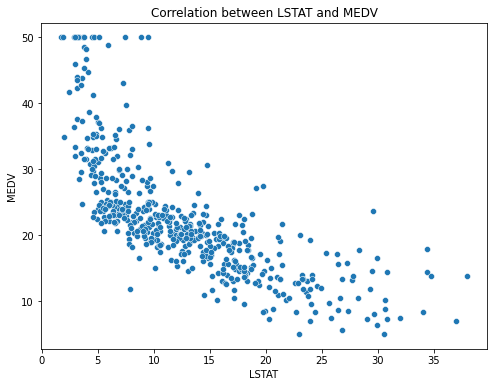

In [214]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfn.LSTAT, dfn.MEDV)
plt.title("Correlation between LSTAT and MEDV")
plt.show()

하위 계층 비율과 주택가격은 
- 정규분포 되어있다 (Nomally distributed)
- 음의 상관 관계를 가진다
- Skewed to the right

따라서 하위 계층 비율이 낮을수록 주택가격은 높고
하위 계층 비율이 높을수록 주택가격은 점점 낮아지는 형태를 가진다


In [279]:
LSTAT_Q1 = dfn['LSTAT'].quantile(0.25)
LSTAT_Q3 = dfn['LSTAT'].quantile(0.75)
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
dfn[dfn['LSTAT']>LSTAT_Q3 + 1.5*LSTAT_IQR]

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
141,21.89,5.019,437,21.2,34.41,14.4
373,18.10,4.906,666,20.2,34.77,13.8
374,18.10,4.138,666,20.2,37.97,13.8
387,18.10,5.000,666,20.2,31.99,7.4
412,18.10,4.628,666,20.2,34.37,17.9
414,18.10,4.519,666,20.2,36.98,7.0
438,18.10,5.935,666,20.2,34.02,8.4


크게 벗어난 이상치들은 없다

###7. 나머지 요소들

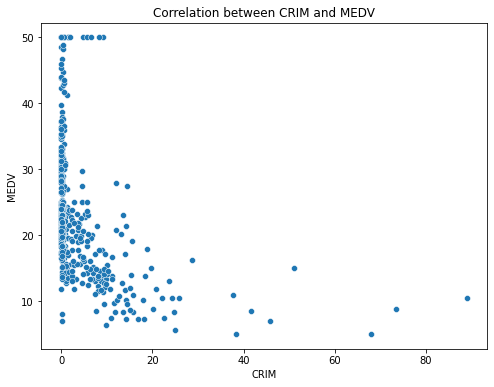

In [219]:
# 1인당 범죄율과 주택가격의 상관 관계
plt.figure(figsize=(8,6))
sns.scatterplot(df.CRIM, dfn.MEDV)
plt.title("Correlation between CRIM and MEDV")
plt.show()

범죄율이 높을수록 주택가격이 높을거라고 예상했지만 
산점도에서 데이터간의 상관관계가 없는걸로 보여진다

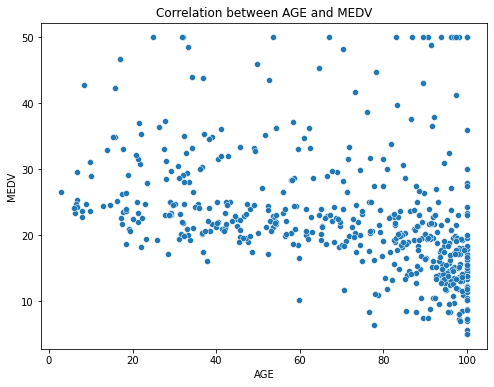

In [220]:
# 1940년 이전에 건축된 주택의 비율과 주택가격의 관계
plt.figure(figsize=(8,6))
sns.scatterplot(df.AGE, dfn.MEDV)
plt.title("Correlation between AGE and MEDV")
plt.show()

1940년 이전에 건축된 주택의 비율이 높을수록 주택가격이 낮을거라 생각을 했지만

그렇지 않은 데이터들도 많았다 

그래도 주택이 노후화 될수록 주택가격이 낮은 경우 꽤 많아서 위의 산점도에서 오른쪽 아래에 모여있는 것을 볼 수 있다

예외가 많은것을 바탕으로 상관관계가 성립되지는 않는다

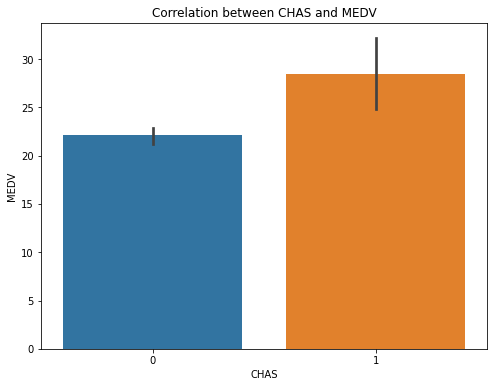

In [222]:
# 찰스강의 경계에 위치한 경우와 주택가격의 관계
plt.figure(figsize=(8,6))
sns.barplot(df.CHAS, df.MEDV)
plt.title("Correlation between CHAS and MEDV")
plt.show()

찰스강의 경계에 위치해 있으면 주택가격이 높을거라 예상했지만

비교해보면 경계에 위치해 있지 않더라고 주택가격이 높은 데이터가 많았다 

그러므로 둘간의 상관관계는 성립하지않는다

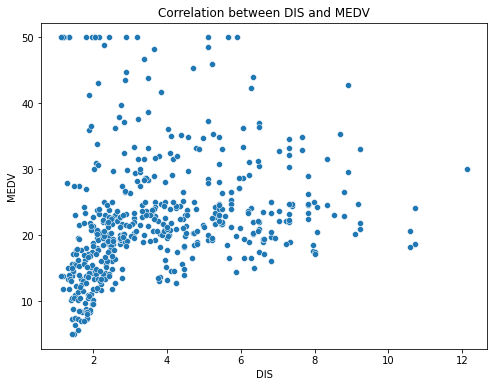

In [223]:
# 직업센터까지의 접근성 지수와 주택가격의 상관관계
plt.figure(figsize=(8,6))
sns.scatterplot(df.DIS, df.MEDV)
plt.title("Correlation between DIS and MEDV")
plt.show()

직업센터까지의 접근성 지수가 높으면 -> 직장까지의 거리가 짧다? 라고 생각하였고

직업센터까지의 접근성 지수가 높으면 출퇴근에 용이하므로 주택가격이 높을거라 예상하였지만

뚜렷한 상관관계는 보여지지 않았다


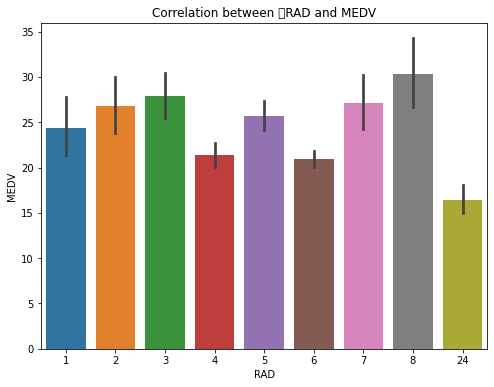

In [224]:
# 고속도로까지의 접근성 지수
plt.figure(figsize=(8,6))
sns.barplot(df.RAD, df.MEDV)
plt.title("Correlation between RAD and MEDV")
plt.show()

고속도로까지의 접근성 지수가 높을수록 주택가격이 높을거라 예상하였지만 

뚜렷한 상관관계는 보여지지 않았다

### Hint

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>